# AI Project
## Done by: Bogdan, Savva and Spinghar

### Step 1
We make all necessary imports and install few libraries, which were not present in Jupyter notebook by default.

In [3]:
pip install textblob


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install wordcloud


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re, string, unicodedata
import sklearn
import textblob
import wordcloud
import plotly as go
import plotly.express as px
import plotly.figure_factory as ff


import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('sms.csv')
df = df.rename(columns={"SMS test": "SMS"})
df.head(10)

,Fraudolent,SMS,ID,Date and Time
0,0,Squeeeeeze!! This is christmas hug.. If u lik ...,1EWYRBL,2017-12-02
1,0,And also I've sorta blown him off a couple tim...,ZY4PDK7,2018-03-23
2,0,Mmm thats better now i got a roast down me! i...,KLUX2C6,2016-10-29
3,0,Mm have some kanji dont eat anything heavy ok,955HXJ0,2018-04-12
4,0,So there's a ring that comes with the guys cos...,00Q6EUC,2016-08-01
5,0,Sary just need Tim in the bollox &it hurt him ...,47ON101,2016-09-18
6,0,"Love isn't a decision, it's a feeling. If we c...",UJ692M7,2018-04-18
7,0,My supervisor find 4 me one lor i thk his stud...,08XXXAW,2017-03-15
8,0,Dear good morning now only i am up,CH1OYGS,2018-02-06
9,0,I'm in chennai velachery:),QM6013N,2016-07-31


### Step 2
We read the dataset and perform initial analysis.

EDA:

In [7]:
df.describe()

,Fraudolent
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [8]:
df['Fraudolent'].value_counts()

0    4825
1     747
Name: Fraudolent, dtype: int64

In [9]:
missing_values = df.isnull().sum()
print(missing_values)

Fraudolent       0
SMS              0
ID               0
Date and Time    0
dtype: int64


We have checked the distribution for the dataset. There are good news, the data integrity holds, there are no null values, hence we do not need to perform any actions to repair data and deal with null values. 

On the other hand though, there are some problems with the dataset. Data has much more non-fradoulent messages, then it does have fradoulent and that might potentialy harm the model performance.

But before that we first need to clean up the text. Remove the speical characters, oftenly appearning words,

In [10]:
nltk.download('stopwords')
tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')
print(df["SMS"])

[nltk_data] Downloading package stopwords to /Users/savva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'ToktokTokenizer' is not defined

In [ ]:
def fixText(text):
    text = re.sub('\[[^]]*\]', '', text)
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

df['SMS']=df['SMS'].apply(fixText)

In [11]:
#Now when dataset text is fixed it is time to split consider the type of problem we are facing and how to solve it
print(df)

      Fraudolent                                                SMS       ID  \
0              0  Squeeeeeze!! This is christmas hug.. If u lik ...  1EWYRBL   
1              0  And also I've sorta blown him off a couple tim...  ZY4PDK7   
2              0  Mmm thats better now i got a roast down me! i...  KLUX2C6   
3              0      Mm have some kanji dont eat anything heavy ok  955HXJ0   
4              0  So there's a ring that comes with the guys cos...  00Q6EUC   
...          ...                                                ...      ...   
5567           0  Hi, wlcome back, did wonder if you got eaten b...  OFHHNSI   
5568           0                             Sorry, I'll call later  NNFNPJ5   
5569           0      Prabha..i'm soryda..realy..frm heart i'm sory  JPLE0P7   
5570           0                         Nt joking seriously i told  BISJ01E   
5571           0            Did he just say somebody is named tampa  Z3BWS55   

     Date and Time  
0       2017-12-02

### Step 3
Time to vectorize the textual input, so that model would be able to use it. We are using Tfidf vectorizer. Also we need to split the data. So that the dataset will be balanced, yes it would be smaller, but the model will train faster and will actually learn instead of just guessing.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(df["SMS"], df["Fraudolent"], test_size=0.25, random_state=42)

tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)



In [13]:
#print(X_train[0])

### Step 4
Determine the problem type and methods to solve it. This is a classical classification problem, we need to determine whether the SMS is fradoulent or not. To do this we can use many methods we have studied in class. We should start with KNN and SVM and finaly try an artificial neural network.

## KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knnc = KNeighborsClassifier()
knnc.fit(X_train, y_train)

KNeighborsClassifier()

Check the results aquired and visualize them, for meaningful later analysis.

Accuracy: 0.9576453697056713
Confusion matrix:
[[1183    2]
 [  57  151]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1185
           1       0.99      0.73      0.84       208

    accuracy                           0.96      1393
   macro avg       0.97      0.86      0.91      1393
weighted avg       0.96      0.96      0.95      1393



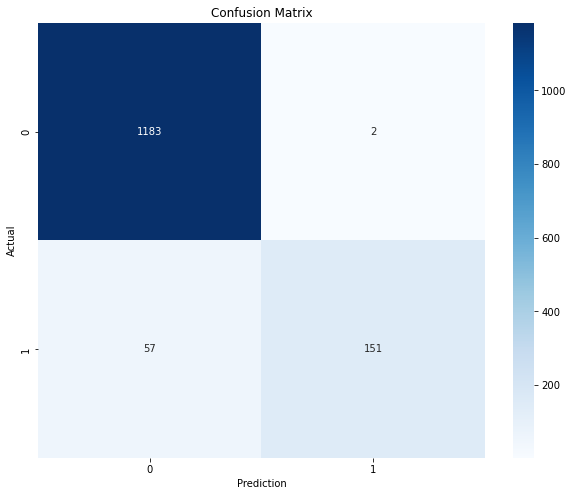

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

#The classification report code is based on the one we did in class.

#KNN predict
y_pred = knnc.predict(X_test)

#Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(confusion)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

#Confusion matrix (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
#We have got a pretty decent results. 95% accuracy is a good approximation for such a diffiult task (natural language).
#Also confusion matrix is quite balanced. There are more FP than FN, but in general they are more or less balanced.
#We can see that the model actualy tries to make a choice, instead of always guessing one particuklar value.

### SVM CLASSIFIER

In [18]:
from sklearn.svm import SVC

svmca = SVC(kernel='rbf', C=1.0, random_state=42) #RBF because I do not thing that it would be linear
svmca.fit(X_train, y_train)

SVC(random_state=42)

Accuracy: 0.9777458722182341
Confusion matrix:
[[1185    0]
 [  31  177]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1185
           1       1.00      0.85      0.92       208

    accuracy                           0.98      1393
   macro avg       0.99      0.93      0.95      1393
weighted avg       0.98      0.98      0.98      1393



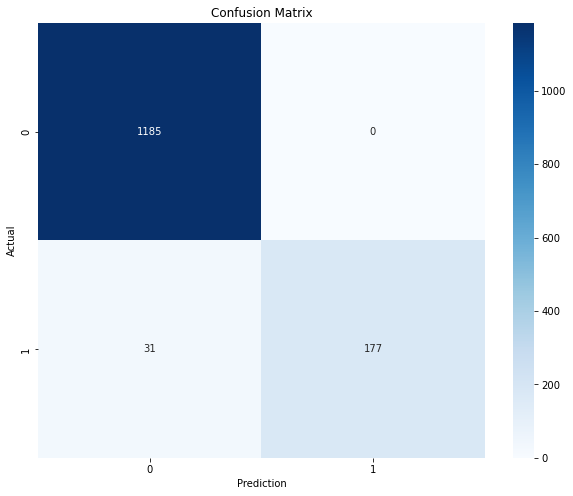

In [19]:
#The classification report code is based on the one we did in class.

#SVM predict
y_pred = svmca.predict(X_test)

#Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(confusion)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

#Confusion matrix (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#We are getting even better results. 97% is amazing result, given the little data we had at our displosal, another good thing
#Is that we got no false positive (When running trials there sometimes were sone but never >5). Meaning good messages are essentialy never marked as fraud, so our system
#Will not intercept "good" messages, which is very important for us.

### Artificial neural network

In [20]:
pip install tensorflow


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [43]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(1, activation='ReLU', input_dim=7434))
model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=1)
warnings.filterwarnings("ignore")

Epoch 1/100


2023-12-04 20:45:14.052320: W tensorflow/core/framework/op_kernel.cc:1827] INVALID_ARGUMENT: TypeError: 'SparseTensor' object is not subscriptable
Traceback (most recent call last):

  File "/Users/savva/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/ops/script_ops.py", line 268, in __call__
    return func(device, token, args)

  File "/Users/savva/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/ops/script_ops.py", line 146, in __call__
    outputs = self._call(device, args)

  File "/Users/savva/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/ops/script_ops.py", line 153, in _call
    ret = self._func(*args)

  File "/Users/savva/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/Users/savva/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/data_adapter.py", line 519, in py_method
    return [slice_array(inp) for inp in flat_inputs]

  File "/

InvalidArgumentError: Graph execution error:

Detected at node EagerPyFunc defined at (most recent call last):
<stack traces unavailable>
TypeError: 'SparseTensor' object is not subscriptable
Traceback (most recent call last):

  File "/Users/savva/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/ops/script_ops.py", line 268, in __call__
    return func(device, token, args)

  File "/Users/savva/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/ops/script_ops.py", line 146, in __call__
    outputs = self._call(device, args)

  File "/Users/savva/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/ops/script_ops.py", line 153, in _call
    ret = self._func(*args)

  File "/Users/savva/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/Users/savva/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/data_adapter.py", line 519, in py_method
    return [slice_array(inp) for inp in flat_inputs]

  File "/Users/savva/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/data_adapter.py", line 519, in <listcomp>
    return [slice_array(inp) for inp in flat_inputs]

  File "/Users/savva/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/data_adapter.py", line 515, in slice_array
    return training_utils.slice_arrays(

  File "/Users/savva/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training_utils.py", line 47, in slice_arrays
    entries = [[x[i : i + 1] for i in indices] for x in arrays]

  File "/Users/savva/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training_utils.py", line 47, in <listcomp>
    entries = [[x[i : i + 1] for i in indices] for x in arrays]

  File "/Users/savva/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training_utils.py", line 47, in <listcomp>
    entries = [[x[i : i + 1] for i in indices] for x in arrays]

TypeError: 'SparseTensor' object is not subscriptable


	 [[{{node EagerPyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_9557]

e-packages/tensorflow/python/ops/script_ops.py", line 268, in __call__
    return func(device, token, args)

  File "/Users/savva/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/ops/script_ops.py", line 146, in __call__
    outputs = self._call(device, args)

  File "/Users/savva/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/ops/script_ops.py", line 153, in _call
    ret = self._func(*args)

  File "/Users/savva/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/Users/savva/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/data_adapter.py", line 519, in py_method
    return [slice_array(inp) for inp in flat_inputs]

  File "/Users/savva/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/data_adapter.py", line 519, in <listcomp>
    return [slice_array(inp) for inp in flat_inputs]

  File "/Users/savva/opt/anaconda3/lib/python3.9/site-packages/keras

  File "/Users/savva/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/Users/savva/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/data_adapter.py", line 519, in py_method
    return [slice_array(inp) for inp in flat_inputs]

  File "/Users/savva/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/data_adapter.py", line 519, in <listcomp>
    return [slice_array(inp) for inp in flat_inputs]

  File "/Users/savva/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/data_adapter.py", line 515, in slice_array
    return training_utils.slice_arrays(

  File "/Users/savva/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training_utils.py", line 47, in slice_arrays
    entries = [[x[i : i + 1] for i in indices] for x in arrays]

  File "/Users/savva/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training_utils.py", line 47, in <listcomp>
    entries 

44/44 [==============================] - 0s 750us/step
Accuracy: 0.8657573582196698
Confusion matrix:
[[1206    0]
 [ 187    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1206
           1       0.00      0.00      0.00       187

    accuracy                           0.87      1393
   macro avg       0.43      0.50      0.46      1393
weighted avg       0.75      0.87      0.80      1393



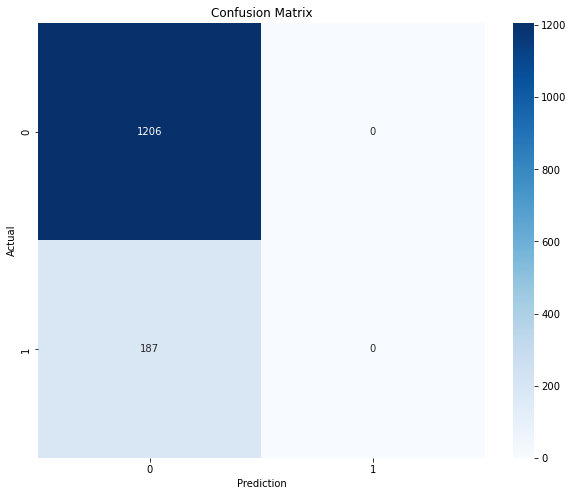

In [44]:
#The classification report code is based on the one we did in class.

#ANN predict
y_pred_a = model.predict(X_test)
y_pred = []
for el in y_pred_a:
    if (int(el) >= 0.5):
        y_pred.append(1)
    else:
        y_pred.append(0)
#Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(confusion)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

#Confusion matrix (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Here we can see that since the dataset was unbalanced, the neural netowrk just decided to always label as message
#As non fradulent, this strategy yields seemingly decent results, but is not good for us, since we actually want to
#Get rid of the fraudulent messages. So we either should use more balance dataset, or resort to some other method. I
#Would prefer to go back to SVM, since it's performance is already satisfactory.